### Часть 1. EDA и Preprocessing

In [965]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [966]:
data = pd.read_csv("data\german_credit_data.csv")
data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [967]:
data = data.drop(data.columns[0], axis=1)
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


In [968]:
data.shape

(1000, 9)

In [969]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


Следует отметить, что на сайте неверно указан тип данного прознака: *Checking account (numeric, in DM - Deutsch Mark)*. Но, на самом деле признак категориальный - см. вывод *data.describe()*.

In [970]:
data.empty

False

In [971]:
nan_count = data.isna().sum()
nan_count

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

Признак *Saving accounts* - текущее состояние накопительного счёта. Логично предположить, что если состояние счёта не указано, то накоплений вероятно нет или сумма накоплений незначительная. Я предлагаю заменить значение NaN на 'none' (признак категориальный).

In [972]:
data['Saving accounts'] = data['Saving accounts'].apply(lambda x: 'none' if pd.isna(x) else x)
data.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts       0
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

Признак *Checking account* - состояние текущего (личного) счёта. Логично предположить, что если состояние текущего не указано, то счёта вероятно нет. Я предлагаю заменить значение NaN на 'none' (признак категориальный).

In [973]:
data['Checking account'] = data['Checking account'].apply(lambda x: 'none' if pd.isna(x) else x)
data.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [974]:
data['Saving accounts'].value_counts(normalize=True).sort_index()

Saving accounts
little        0.603
moderate      0.103
none          0.183
quite rich    0.063
rich          0.048
Name: proportion, dtype: float64

In [975]:
data['Checking account'].value_counts(normalize=True).sort_index()

Checking account
little      0.274
moderate    0.269
none        0.394
rich        0.063
Name: proportion, dtype: float64

In [976]:
data['Job'].value_counts(normalize=True).sort_index()

Job
0    0.022
1    0.200
2    0.630
3    0.148
Name: proportion, dtype: float64

In [977]:
data.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

In [978]:
data['Age'] = data['Age'].astype('float')
data['Credit amount'] = data['Credit amount'].astype('float')
data['Duration'] = data['Duration'].astype('float')

In [979]:
from sklearn.preprocessing import OrdinalEncoder

In [980]:
encoder = OrdinalEncoder().set_output(transform="pandas")
data = encoder.fit_transform(data)
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,48.0,1.0,2.0,1.0,2.0,0.0,142.0,2.0,5.0
1,3.0,0.0,2.0,1.0,0.0,1.0,770.0,29.0,5.0
2,30.0,1.0,1.0,1.0,0.0,2.0,390.0,8.0,3.0
3,26.0,1.0,2.0,0.0,0.0,0.0,848.0,26.0,4.0
4,34.0,1.0,2.0,0.0,0.0,0.0,734.0,17.0,1.0
...,...,...,...,...,...,...,...,...,...
995,12.0,0.0,1.0,1.0,0.0,2.0,310.0,8.0,4.0
996,21.0,1.0,3.0,1.0,0.0,0.0,661.0,21.0,1.0
997,19.0,1.0,2.0,1.0,0.0,2.0,69.0,8.0,5.0
998,4.0,1.0,2.0,0.0,0.0,0.0,332.0,27.0,5.0


In [981]:
data.dtypes

Age                 float64
Sex                 float64
Job                 float64
Housing             float64
Saving accounts     float64
Checking account    float64
Credit amount       float64
Duration            float64
Purpose             float64
dtype: object

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Job'}>],
       [<Axes: title={'center': 'Housing'}>,
        <Axes: title={'center': 'Saving accounts'}>,
        <Axes: title={'center': 'Checking account'}>],
       [<Axes: title={'center': 'Credit amount'}>,
        <Axes: title={'center': 'Duration'}>,
        <Axes: title={'center': 'Purpose'}>]], dtype=object)

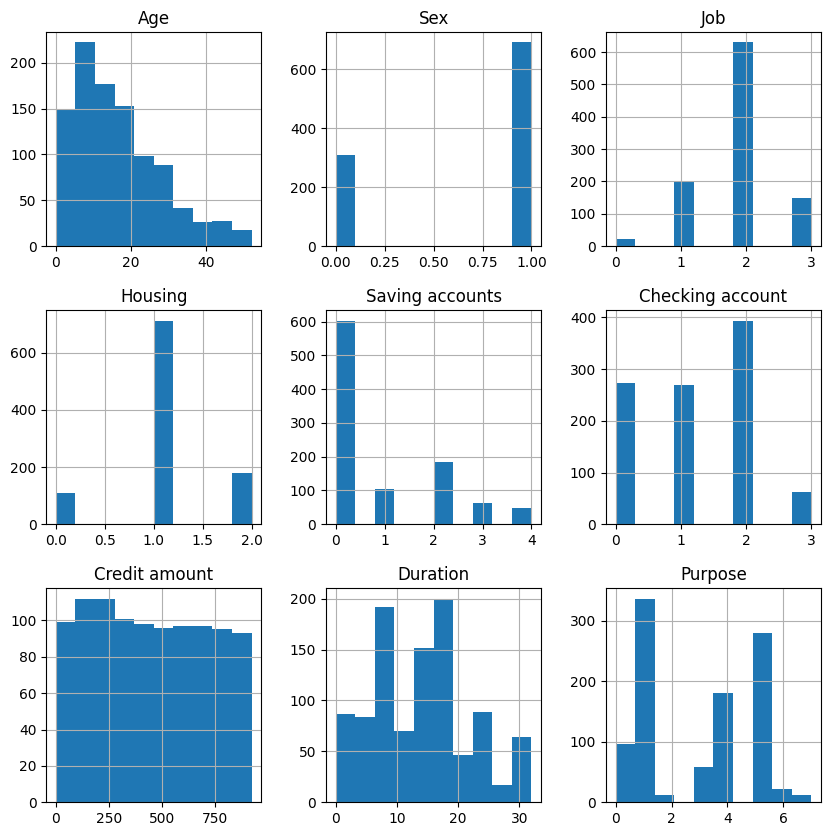

In [982]:
data.hist(figsize=(10,10))

<Axes: >

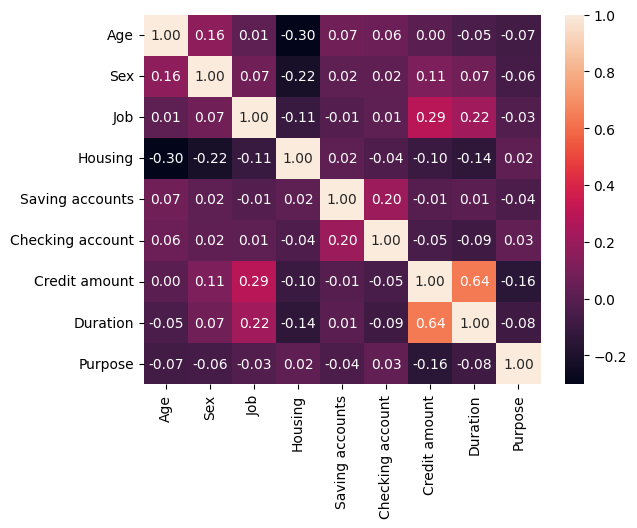

In [983]:
plt.figure()
sns.heatmap(data.corr(), annot=True, fmt='.2f')

Есть несильная корреляция между *Credit Amount* и *Duration* . Она обяснима: больший кредит, как правило, даётся на больший срок. Оставляю признаки как есть. 

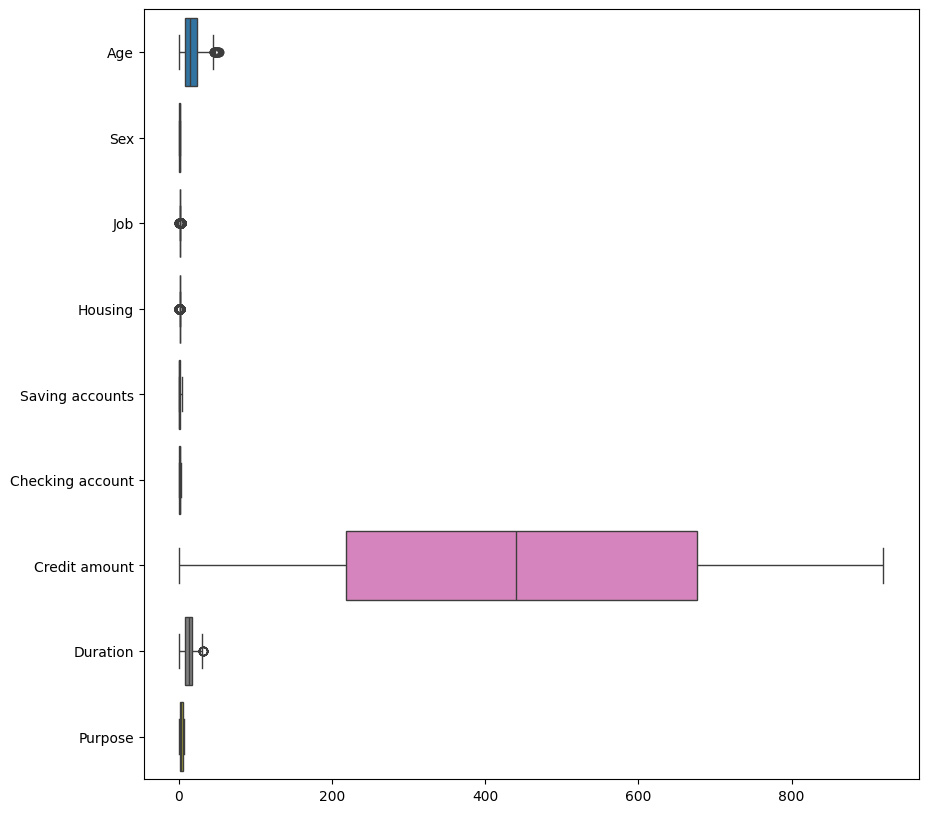

In [984]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data, orient='h');

Ужасная диаграмма

In [985]:
from sklearn.preprocessing import MinMaxScaler

In [986]:
scaler = MinMaxScaler().set_output(transform="pandas")

In [987]:
data = scaler.fit_transform(data)
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0.923077,1.0,0.666667,0.5,0.50,0.000000,0.154348,0.06250,0.714286
1,0.057692,0.0,0.666667,0.5,0.00,0.333333,0.836957,0.90625,0.714286
2,0.576923,1.0,0.333333,0.5,0.00,0.666667,0.423913,0.25000,0.428571
3,0.500000,1.0,0.666667,0.0,0.00,0.000000,0.921739,0.81250,0.571429
4,0.653846,1.0,0.666667,0.0,0.00,0.000000,0.797826,0.53125,0.142857
...,...,...,...,...,...,...,...,...,...
995,0.230769,0.0,0.333333,0.5,0.00,0.666667,0.336957,0.25000,0.571429
996,0.403846,1.0,1.000000,0.5,0.00,0.000000,0.718478,0.65625,0.142857
997,0.365385,1.0,0.666667,0.5,0.00,0.666667,0.075000,0.25000,0.714286
998,0.076923,1.0,0.666667,0.0,0.00,0.000000,0.360870,0.84375,0.714286


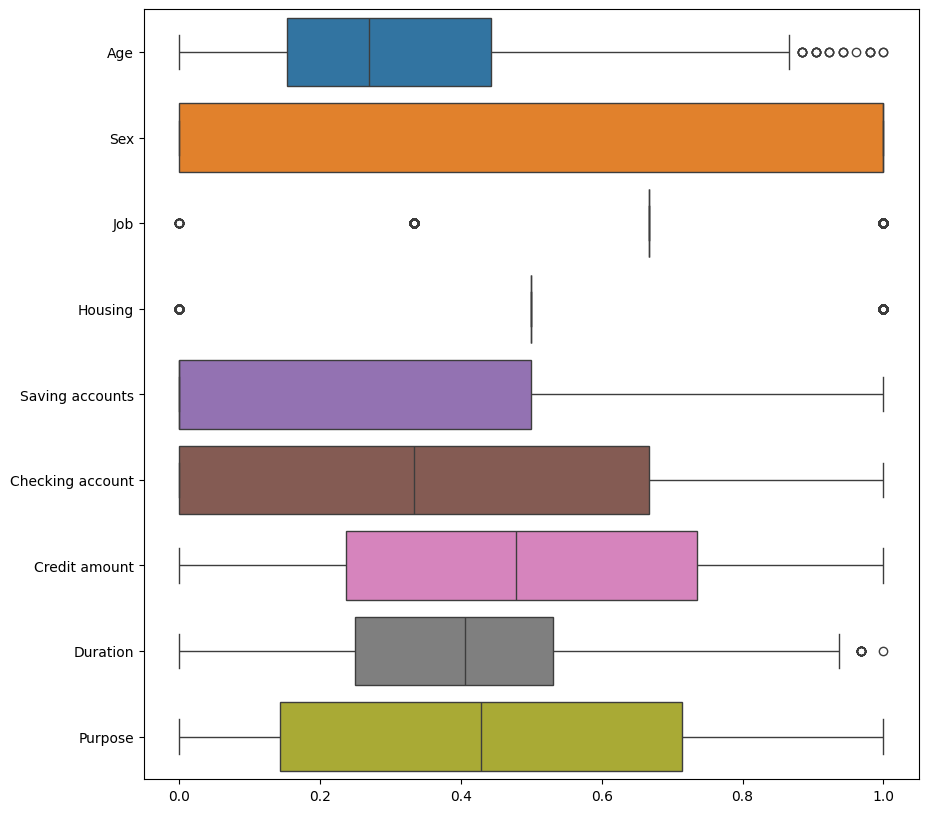

In [988]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data, orient='h');

Понижение размерности для визуальной оценки методом tSNE

In [989]:
from sklearn.manifold import TSNE

In [990]:
tsne = TSNE(n_components=2, random_state=13)
data_tsne = tsne.fit_transform(data)
data_tsne.shape

(1000, 2)

Понижение размерности для визуальной оценки методом PCA

In [991]:
from sklearn.decomposition import PCA

In [992]:
pca = PCA(n_components=2, random_state=13)
data_pca = pca.fit_transform(data)
data_pca.shape

(1000, 2)

Понижение размерности для визуальной оценки методом UMAP

In [993]:
import umap

In [994]:
umap = umap.UMAP(random_state=13)
data_umap = umap.fit_transform(data)
data_umap.shape

c:\Users\MVKiselev\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(1000, 2)

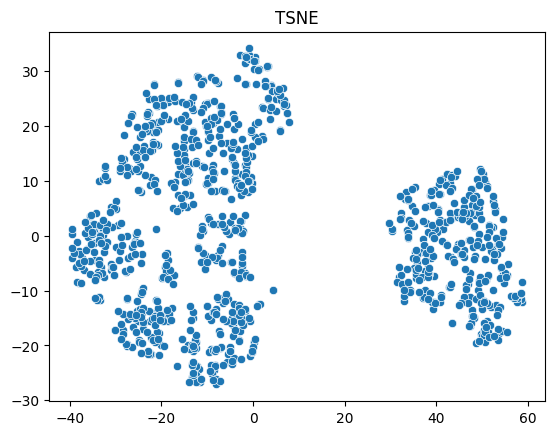

In [995]:
sns.scatterplot(x=data_tsne[:,0], y=data_tsne[:,1]).set_title('TSNE');

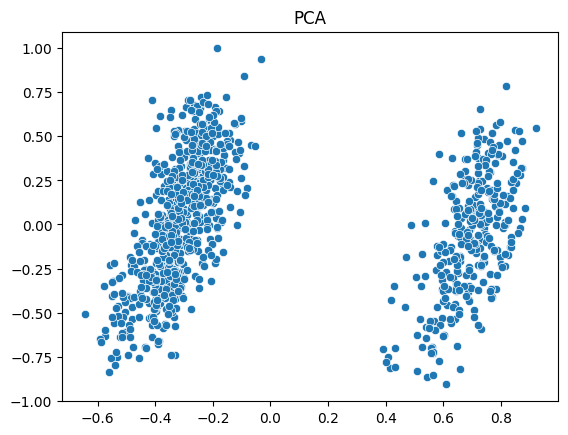

In [996]:
sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1]).set_title('PCA');

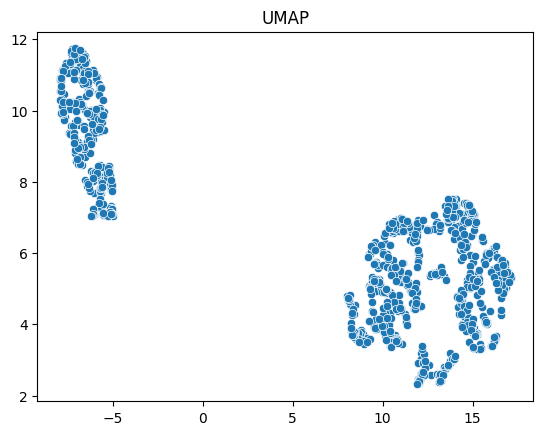

In [997]:
sns.scatterplot(x=data_umap[:,0], y=data_umap[:,1]).set_title('UMAP');

Я вижу семь кластеров (tSNE):



![alt text](image.png)

Два кластера (PCA)

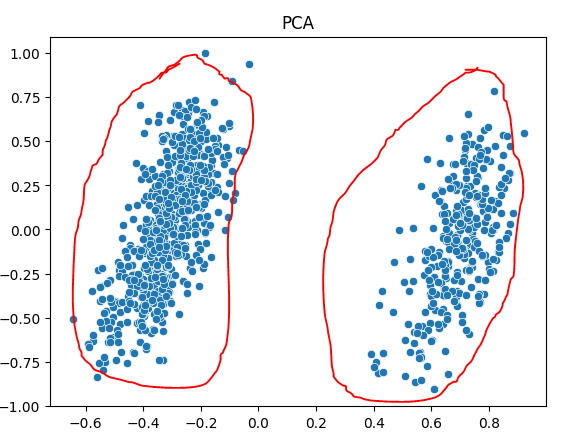

Три кластера (UMAP)

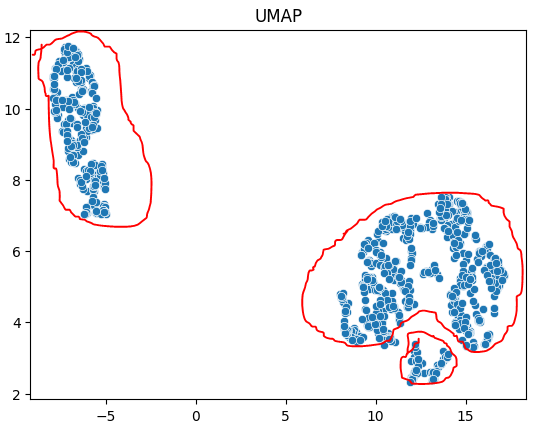

Может я ошибаюсь. Сейчас проверим.

In [998]:
from sklearn.cluster import KMeans

In [999]:
kmeans = KMeans(n_clusters=7, random_state=10, n_init=10).fit(data)
labels = kmeans.labels_

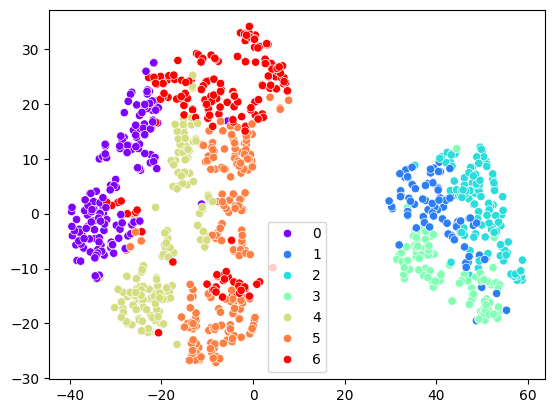

In [1000]:
sns.scatterplot(x=data_tsne[:,0], y=data_tsne[:,1], hue=labels, palette='rainbow');

Плохо получилось.

### Часть 2. Моделирование

#### 2.1. k-means

In [1001]:
import numpy as np
from scipy.spatial.distance import cdist

In [1002]:
inertias = []
distortions = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=10, n_init=10).fit(data)

    distortions.append(sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])
    inertias.append(kmeans.inertia_)

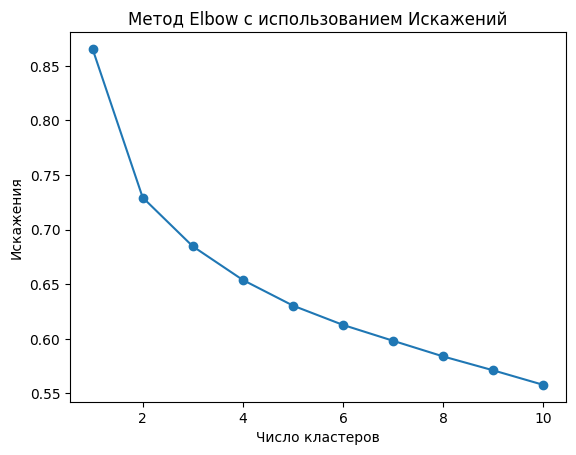

In [1003]:
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Искажения')
plt.title('Метод Elbow с использованием Искажений')
plt.show()

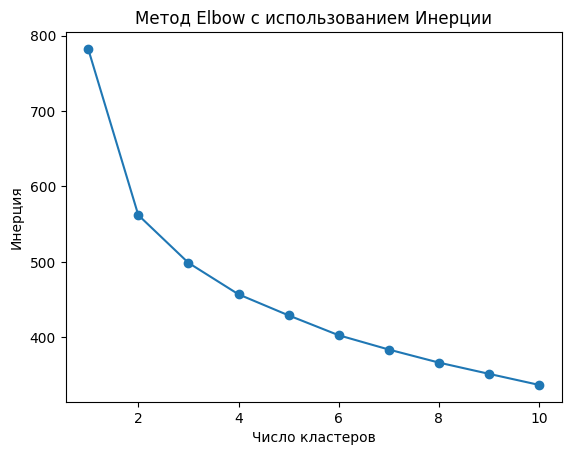

In [1004]:
plt.plot(range(1,11), inertias, marker='o');
plt.xlabel('Число кластеров')
plt.ylabel('Инерция')
plt.title('Метод Elbow с использованием Инерции')
plt.show()

In [1005]:
deltas = []
for i in range(1,9):
    deltas_i = (inertias[i] - inertias[i+1])/(inertias[i-1] - inertias[i])
    deltas.append(deltas_i)

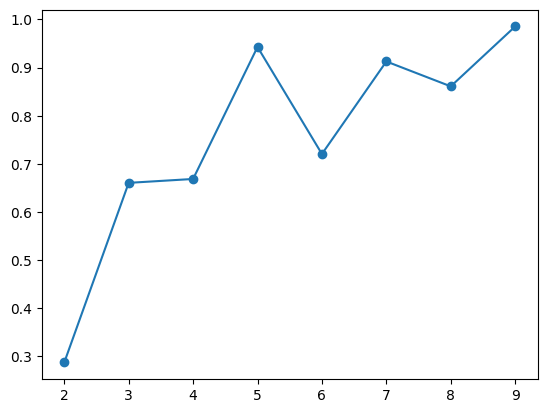

In [1006]:
plt.plot(range(2,10), deltas, marker='o');

Получается, что имеется два кластера

In [1007]:
kmeans = KMeans(n_clusters=2, random_state=10, n_init=10).fit(data)
labels = kmeans.labels_

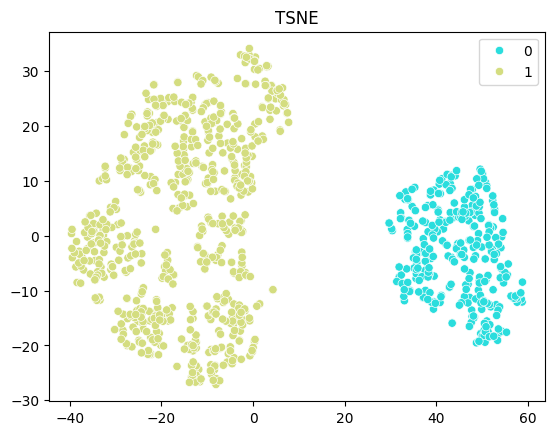

In [1008]:
sns.scatterplot(x=data_tsne[:,0], y=data_tsne[:,1], hue=labels, palette='rainbow').set_title('TSNE');

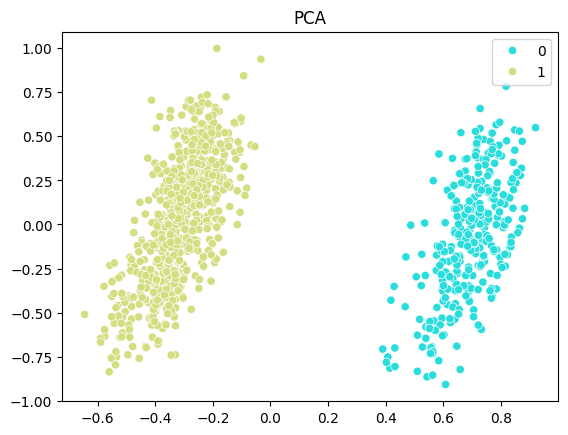

In [1009]:
sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], hue=labels, palette='rainbow').set_title('PCA');

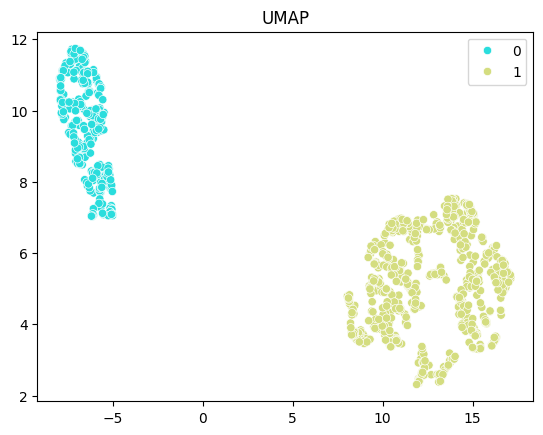

In [1010]:
sns.scatterplot(x=data_umap[:,0], y=data_umap[:,1], hue=labels, palette='rainbow').set_title('UMAP');

Я пробовал три кластера, но получилась ерунда. Поэтому ответ - два кластера

#### 2.2. hierarhical

In [1011]:
from scipy.cluster.hierarchy import dendrogram, linkage

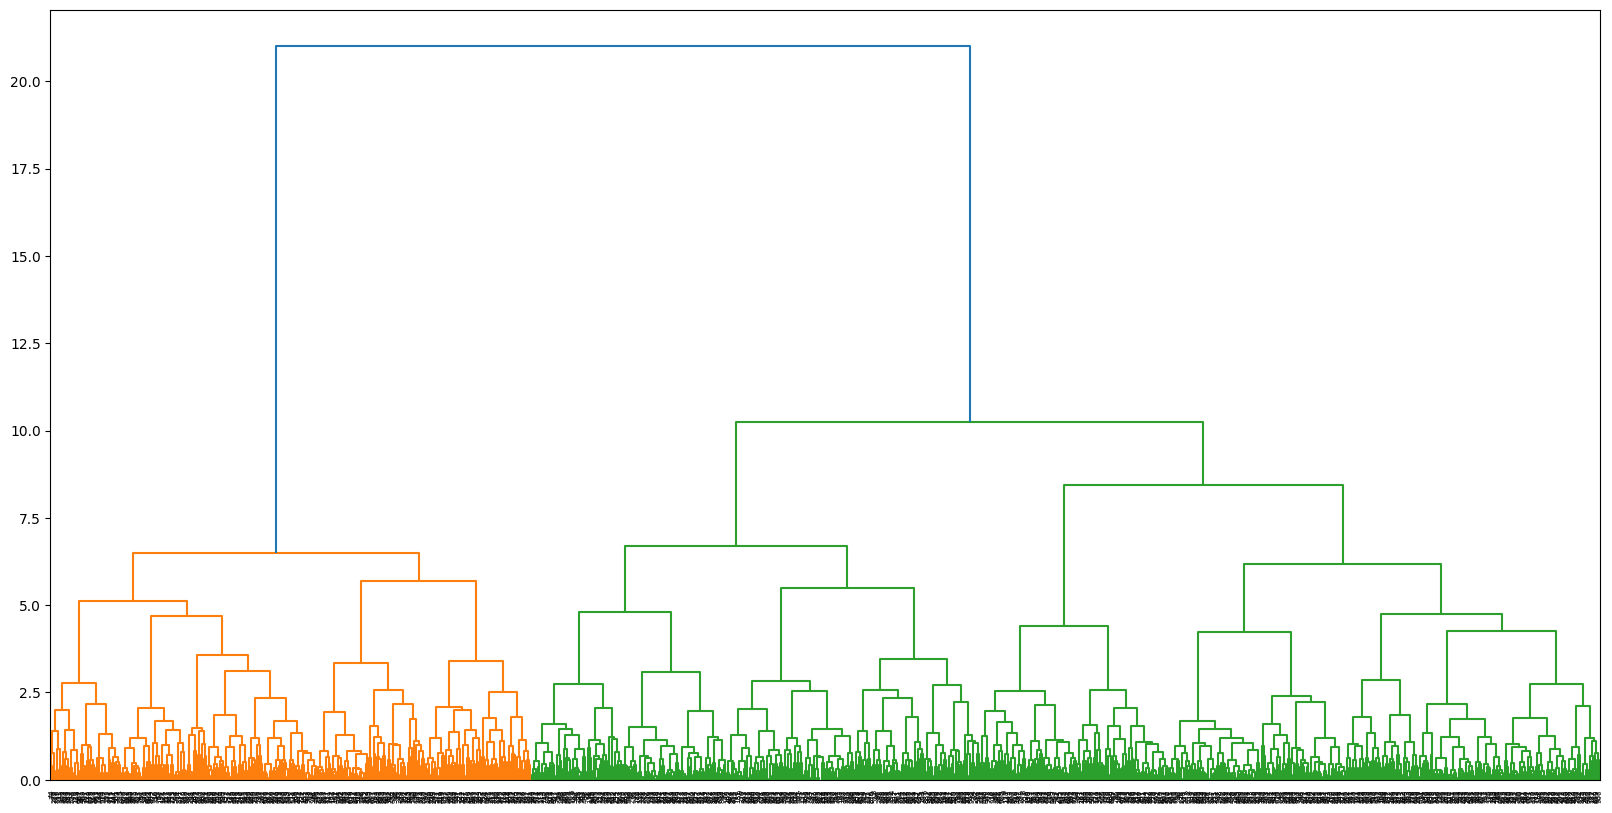

In [1012]:
plt.figure(figsize=(20,10))
dendrogram_ = dendrogram(linkage(data, method='ward'))

Судя по дендограмме, можно выделить два кластера. Но, можно пробовать 3 и 6 кластеров, чисто из любопытства.

In [1013]:
from tqdm import tqdm
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [1014]:
silhouette = []
for i in tqdm(range(2,11)):
    agg = AgglomerativeClustering(n_clusters=i).fit(data)
    labels = agg.labels_
    score = silhouette_score(data, labels)
    silhouette.append(score)

  0%|          | 0/9 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:00<00:00, 22.24it/s]


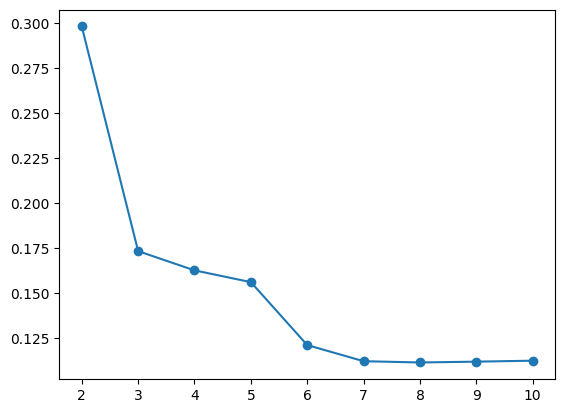

In [1015]:
plt.plot(range(2,11), silhouette, marker='o');

In [1016]:
model = AgglomerativeClustering(n_clusters=2).fit(data)

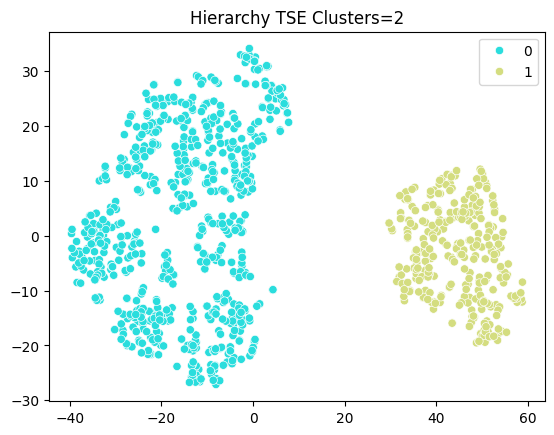

In [1017]:
sns.scatterplot(x=data_tsne[:,0], y=data_tsne[:,1], hue=model.labels_, palette='rainbow').set_title("Hierarchy TSE Clusters=2");

In [1018]:
model = AgglomerativeClustering(n_clusters=3).fit(data)

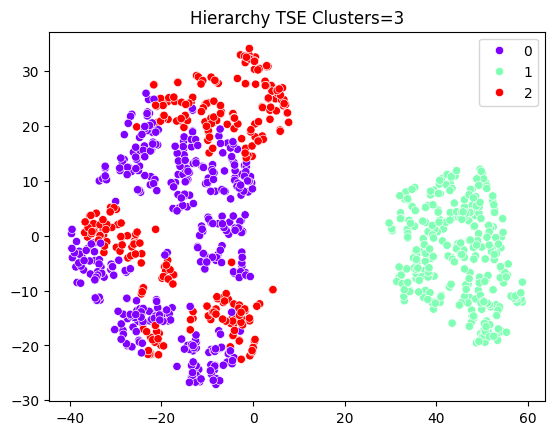

In [1019]:
sns.scatterplot(x=data_tsne[:,0], y=data_tsne[:,1], hue=model.labels_, palette='rainbow').set_title("Hierarchy TSE Clusters=3");

In [1020]:
model = AgglomerativeClustering(n_clusters=6).fit(data)

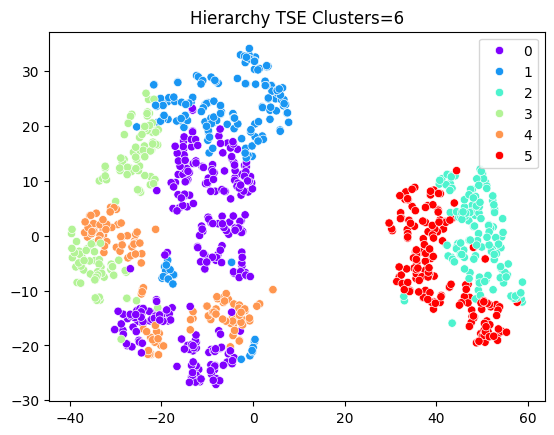

In [1021]:
sns.scatterplot(x=data_tsne[:,0], y=data_tsne[:,1], hue=model.labels_, palette='rainbow').set_title("Hierarchy TSE Clusters=6");

Получается два кластера. Ниже кластеризация данных по PCA и UMAP

In [1022]:
model = AgglomerativeClustering(n_clusters=2).fit(data)

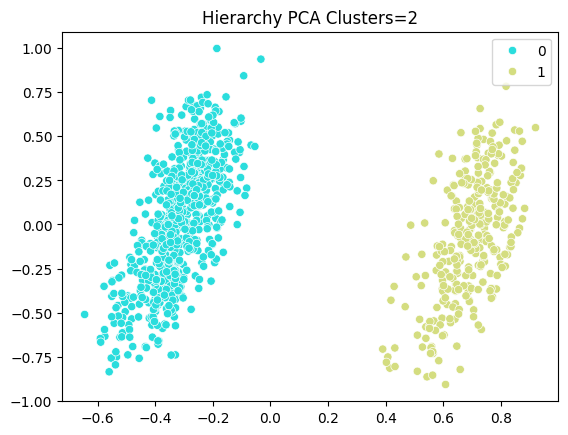

In [1023]:
sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], hue=model.labels_, palette='rainbow').set_title("Hierarchy PCA Clusters=2");

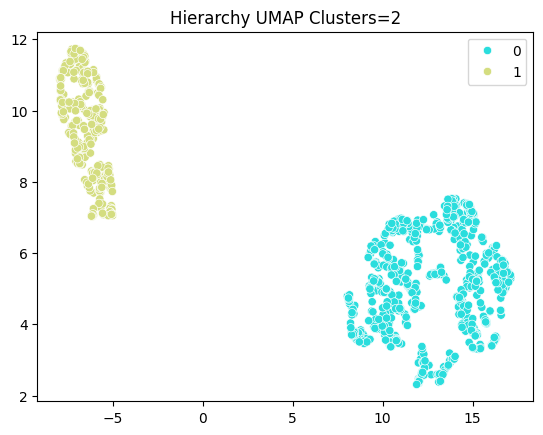

In [1024]:
sns.scatterplot(x=data_umap[:,0], y=data_umap[:,1], hue=model.labels_, palette='rainbow').set_title("Hierarchy UMAP Clusters=2");

In [1025]:
model = AgglomerativeClustering(n_clusters=3).fit(data)

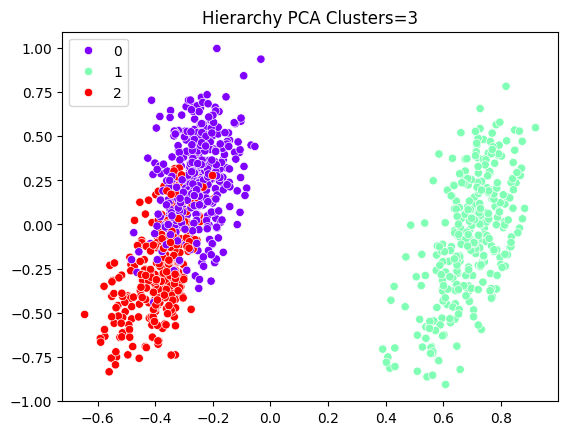

In [1026]:
sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], hue=model.labels_, palette='rainbow').set_title("Hierarchy PCA Clusters=3");

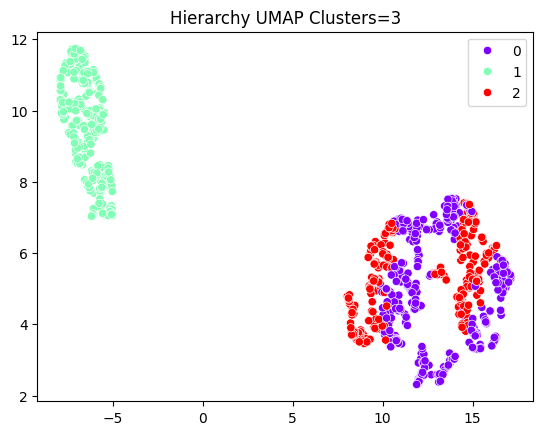

In [1027]:
sns.scatterplot(x=data_umap[:,0], y=data_umap[:,1], hue=model.labels_, palette='rainbow').set_title("Hierarchy UMAP Clusters=3");

Вывод: два кластера

#### 2.3. DBSCAN

In [1028]:
from sklearn.cluster import DBSCAN

In [1029]:
dbscan = DBSCAN().fit(data)

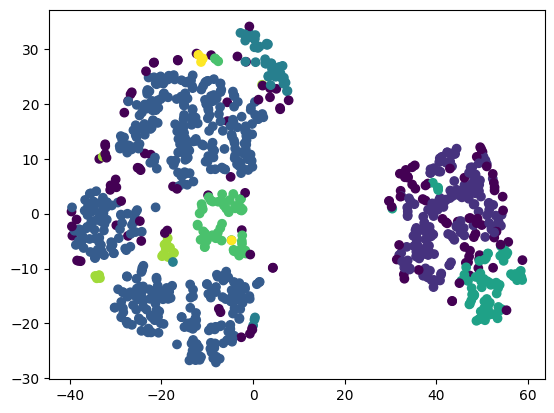

In [1030]:
plt.scatter(data_tsne[:,0], data_tsne[:,1], c=dbscan.labels_);

Получилось плохо. Необходимо подобрать параметр eps

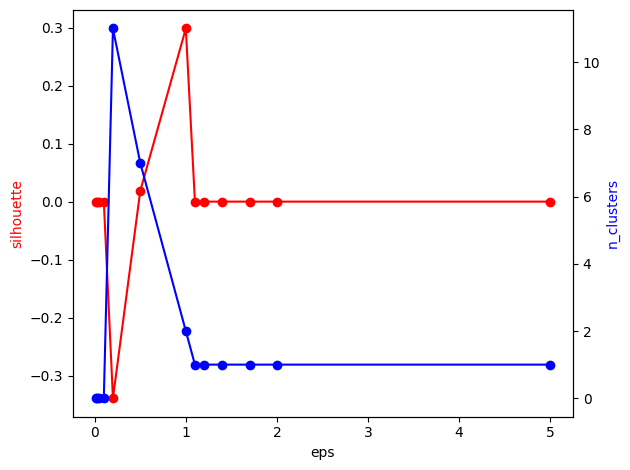

In [1031]:
eps_range = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 1.1, 1.2, 1.4, 1.7, 2.0, 5.0]
silhouette = []
clusters = []

for i in eps_range:
    dbscan = DBSCAN(eps=i).fit(data)
    labels =  np.unique(dbscan.labels_)
    current_clusters = len(labels[labels != -1])
    silhouette.append(silhouette_score(data, dbscan.labels_)) if current_clusters > 1 else silhouette.append(0)
    clusters.append(current_clusters)

fig, ax1 = plt.subplots()

ax1.plot(eps_range, silhouette, marker='o', color='red')
ax1.set_xlabel('eps')
ax1.set_ylabel('silhouette', color='red')

ax2 = ax1.twinx()

ax2.plot(eps_range, clusters, marker='o', color='blue')
ax2.set_ylabel('n_clusters', color='blue')  

fig.tight_layout()


Оптимальный параметр eps = 1, кластеров два

In [1032]:
dbscan = DBSCAN(eps=1.0).fit(data)

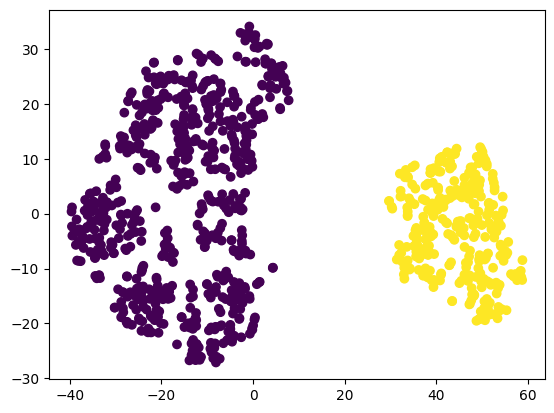

In [1033]:
plt.scatter(data_tsne[:,0], data_tsne[:,1], c=dbscan.labels_);

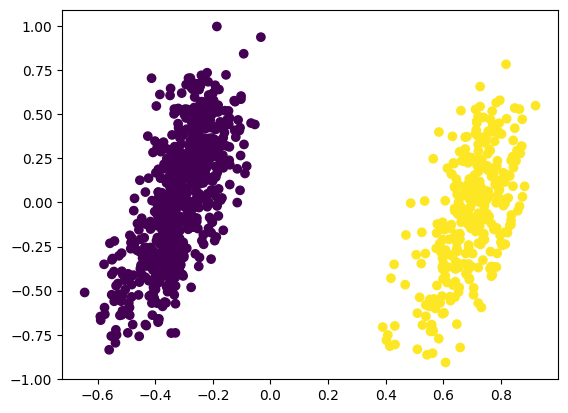

In [1034]:
plt.scatter(data_pca[:,0], data_pca[:,1], c=dbscan.labels_);

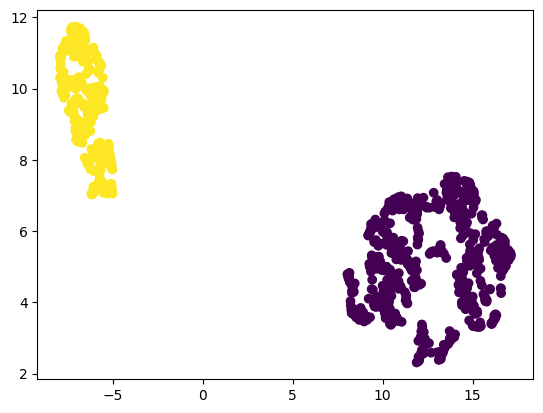

In [1035]:
plt.scatter(data_umap[:,0], data_umap[:,1], c=dbscan.labels_);

Вывод: два кластера. Все методы дали один и тот же результат - два кластера

### Часть 3. Интерпретация

#### 3.1. Расчёт средних значений признаков для каждого кластера

In [1036]:
kmeans = KMeans(n_clusters=2, random_state=10, n_init=10).fit(data)
labels = kmeans.labels_

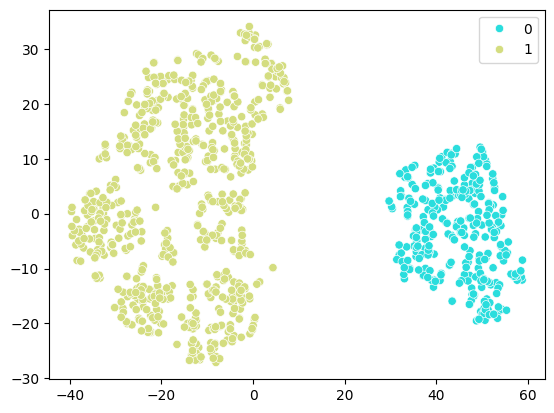

In [1037]:
sns.scatterplot(x=data_tsne[:,0], y=data_tsne[:,1], hue=labels, palette='rainbow');

In [1038]:
data['labels'] = labels
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,labels
0,0.923077,1.0,0.666667,0.5,0.50,0.000000,0.154348,0.06250,0.714286,1
1,0.057692,0.0,0.666667,0.5,0.00,0.333333,0.836957,0.90625,0.714286,0
2,0.576923,1.0,0.333333,0.5,0.00,0.666667,0.423913,0.25000,0.428571,1
3,0.500000,1.0,0.666667,0.0,0.00,0.000000,0.921739,0.81250,0.571429,1
4,0.653846,1.0,0.666667,0.0,0.00,0.000000,0.797826,0.53125,0.142857,1
...,...,...,...,...,...,...,...,...,...,...
995,0.230769,0.0,0.333333,0.5,0.00,0.666667,0.336957,0.25000,0.571429,0
996,0.403846,1.0,1.000000,0.5,0.00,0.000000,0.718478,0.65625,0.142857,1
997,0.365385,1.0,0.666667,0.5,0.00,0.666667,0.075000,0.25000,0.714286,1
998,0.076923,1.0,0.666667,0.0,0.00,0.000000,0.360870,0.84375,0.714286,1


In [1039]:
data['labels'].value_counts(normalize=True).sort_index()

labels
0    0.31
1    0.69
Name: proportion, dtype: float64

In [1040]:
data.groupby('labels').median().T.round(2)

labels,0,1
Age,0.19,0.31
Sex,0.00,1.00
Job,0.67,0.67
Housing,0.50,0.50
Saving accounts,0.00,0.00
Checking account,0.33,0.33
Credit amount,0.40,0.51
Duration,0.41,0.41
Purpose,0.57,0.43


Создаётся впечатление, что группы разделены по гендерному признаку.

#### 3.2. Boxplot-ы для каждого признака

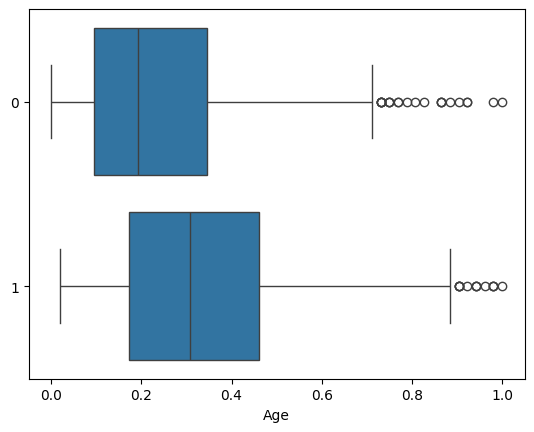

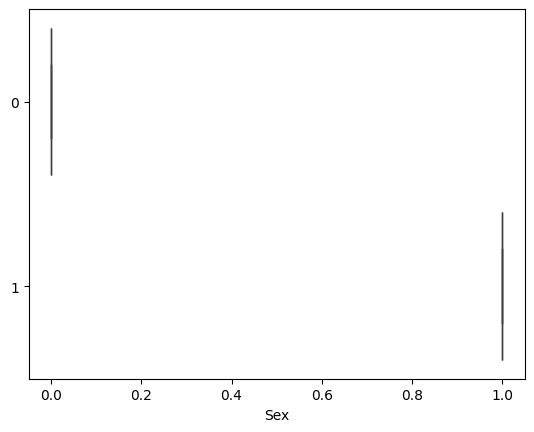

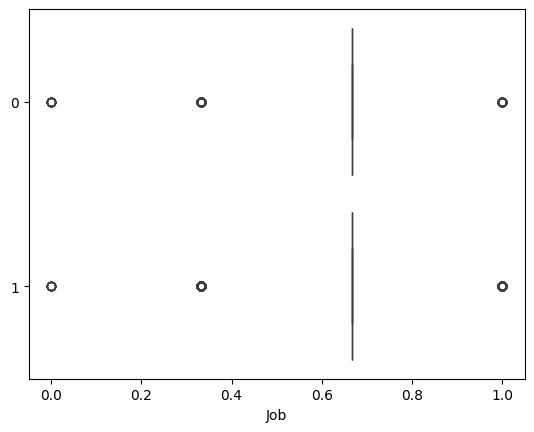

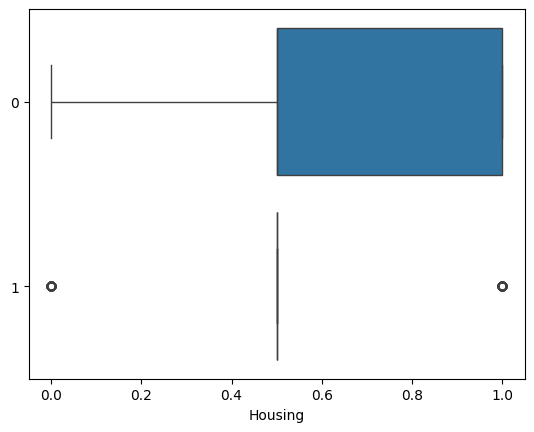

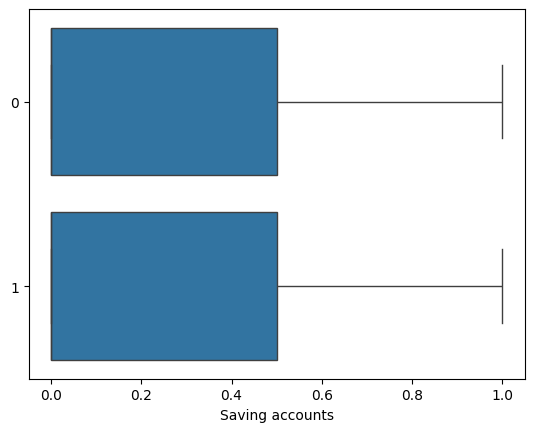

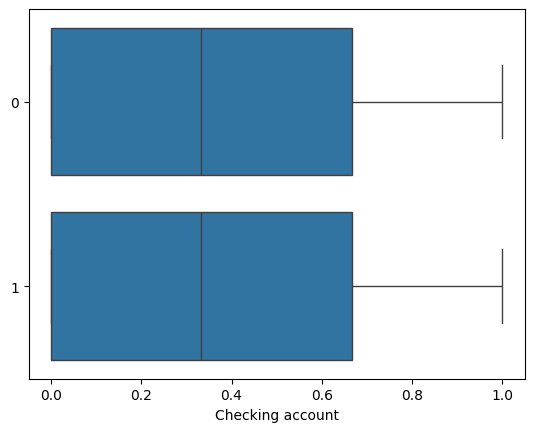

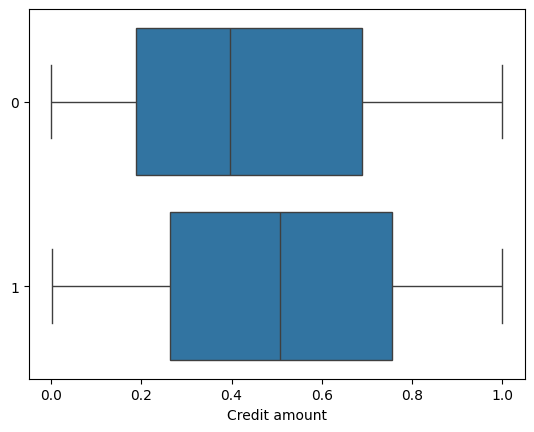

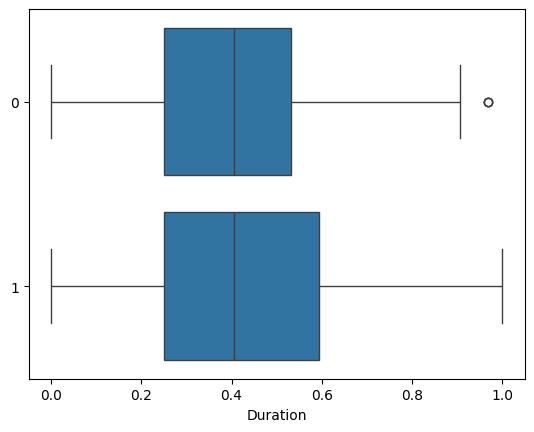

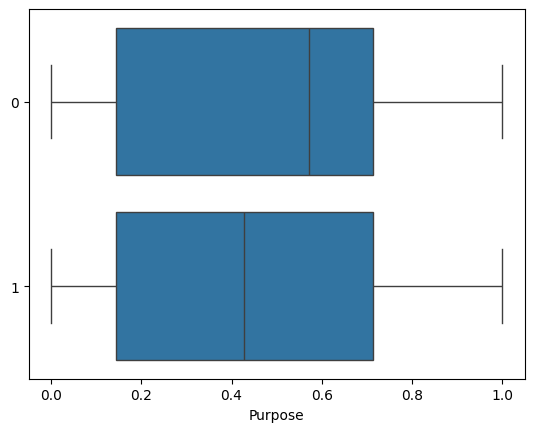

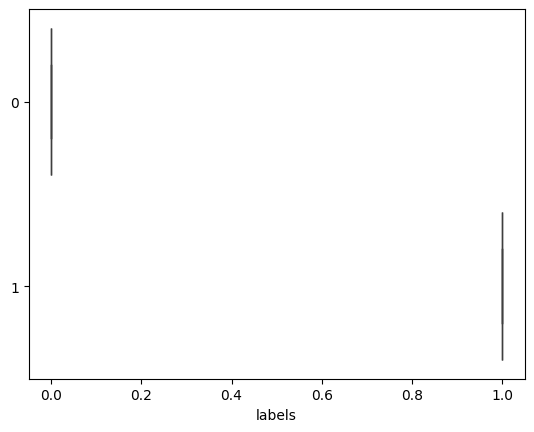

In [1041]:
for col in data.columns:
    sns.boxplot(data=data, x=col, y=labels, orient='h')
    plt.show();

Уверенность в том, что группы разделены по гендерному признаку, усилилась. Причём, мужчинам предоставляют больший кредит и при этом для мужчин установлены более мягкие возрастные ограничения. Для женщин есть некоторые ограничения по целевому использованию кредита.